In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

$$\frac{p-p_\infty}{\rho}=\frac{3}{2} \dot{R}^2 + R \ddot{R} + \frac{2 \sigma}{\rho R} + \frac{4 \nu}{R} \dot{R}$$

adiabatic: $p(R) = p_0 \left(\frac{R_0}{R}\right)^{3\gamma}$

$$\dot{R}=T$$ 

$$\dot{T}= \frac{p_0 R_0^{3\gamma}-p_\infty R^{3\gamma}}{R^{1+3\gamma} \rho}-\frac{3}{2 R} T^2-\frac{2 \sigma}{\rho R^2} - \frac{4\nu T}{R^2} $$

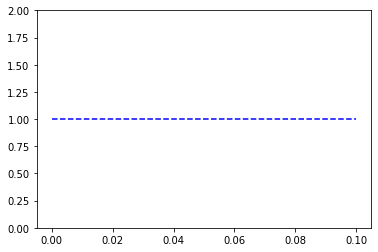

In [60]:
sigma=0.072
gamma=1.4
rho=1000
nu=1e-6
pinf=1e5
R0=1e-6
p0=pinf+2*sigma/R0


const1=p0*R0**(3*gamma)
const2=2*sigma/rho
const3=4*nu

def F(Y,t): return [Y[1],(const1-pinf*Y[0]**(3*gamma))/Y[0]**(1+3*gamma)/rho- 1.5*Y[1]**2/Y[0] - const2/Y[0]**2 - const3*Y[1]/Y[0]**2]

# time range
h=1e-4
t=np.arange(0,1e-1+h,h)

# Y0 contains two entries, corresponding to two initial conditions
Y0=[R0,0]

Y= si.odeint(F,Y0,t)

R=Y[:,0]
Rdot=Y[:,1]
p=p0*R0**(3*gamma)/R**(3*gamma)

plt.plot(t,R/R0,'b--')
#plt.plot(t,Rdot,'r--')
#plt.plot(t,p,'r')
plt.ylim(0,2)
plt.show()

In [46]:
p0

102880.0

In [61]:
R/R0

array([1., 1., 1., ..., 1., 1., 1.])